# | Imports, functions & data load

## | Reset variables

Notebook variables reset for each complete execution of this code :

In [182]:
%reset -f

## | Installations & Imports

### | Installations

In [183]:
# %pip install streamlit

In [184]:
# %pip install catboost

In [185]:
# %pip install xgboost

In [186]:
 %pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [187]:
# %pip install shap

In [188]:
# %pip install tqdm

In [189]:
# %pip install lightgbm

### | Imports

In [190]:
import autopep8

import pandas as pd
import seaborn as sns
import numpy as np
import time
import pickle
import joblib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import array as arr
from tqdm import tqdm
import sklearn
print("Scikit-Learn version : {}".format(sklearn.__version__))

from zipfile import ZipFile

# Preprocessing, Imputing, Upsampling, Model Selection, Model Evaluation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from collections import Counter

#from imblearn.pipeline import make_pipeline
#from imblearn.pipeline import Pipeline as imbpipeline

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import get_scorer_names


#Predictive Models

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# print("lightgbm version : {}".format(lightgbm.__version__))
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Interpreting Predictions

import shap
print("SHAP version : {}".format(shap.__version__))

# app building
import streamlit as st
# print("streamlit version : {}".format(streamlit.__version__))

Scikit-Learn version : 1.5.0
SHAP version : 0.45.1


## | Parameters

In [191]:
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.labelsize': 15,
     'legend.fontsize': 15,
     'axes.titlesize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [192]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# | Test data restore for model interpretation

In [193]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')
X_test

,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE_Cashloans,NAME_CONTRACT_TYPE_Revolvingloans,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Highereducation,NAME_EDUCATION_TYPE_Secondary_secondaryspecial,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_blockofflats,WALLSMATERIAL_MODE_Panel,DAYS_EMPLOYED_PERC,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_CREDIT_ACTIVE_Closed_MEAN,BURO_CREDIT_TYPE_Creditcard_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MEAN,PREV_APP_CREDIT_PERC_MEAN,PREV_HOUR_APPR_PROCESS_START_MIN,PREV_HOUR_APPR_PROCESS_START_MAX,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MEAN,PREV_NAME_CONTRACT_TYPE_Consumerloans_MEAN,PREV_NAME_CONTRACT_TYPE_Revolvingloans_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_MEAN,PREV_NAME_PAYMENT_TYPE_XNA_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,PREV_NAME_TYPE_SUITE_nan_MEAN,PREV_NAME_GOODS_CATEGORY_Furniture_MEAN,PREV_NAME_GOODS_CATEGORY_XNA_MEAN,PREV_NAME_PORTFOLIO_Cards_MEAN,PREV_NAME_PORTFOLIO_POS_MEAN,PREV_NAME_PRODUCT_TYPE_walkin_MEAN,PREV_CHANNEL_TYPE_APCashloan_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_CardStreet_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,PREV_PRODUCT_COMBINATION_CashXSellhigh_MEAN,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,APPROVED_AMT_ANNUITY_MAX,APPROVED_AMT_ANNUITY_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_APP_CREDIT_PERC_MAX,APPROVED_AMT_GOODS_PRICE_MAX,APPROVED_AMT_GOODS_PRICE_MEAN,APPROVED_HOUR_APPR_PROCESS_START_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,APPROVED_DAYS_DECISION_MIN,APPROVED_DAYS_DECISION_MEAN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,1.0,521280.0,450000.0,0.008575,-15323.0,-1503.0,-2574.0,-3753.0,1.0,2.0,2.0,0.0,0.0,0.494646,0.598417,0.535276,0.0,0.0000,0.0034,0.0,0.0000,0.0036,0.0,0.0000,0.0035,0.0033,1.0,0.0,-1238.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.098088,-2446.0,-2446.0,-2446.000000,3.851066e+05,-2081.0,-2081.0,-2081.000000,-342.000000,0.000000,0.000000,0.000000,0.0,-764.0,-258.0,-537.309524,108150.333333,1051.0,-2002.0,-1366.555556,-761.5,8491.725,8491.725000,1.137221,14.0,17.0,15.500000,0.265029,0.132514,-1863.0,-1550.500000,1.000000,0.000000,0.500000,0.500000,1.000000,0.000000,0.500000,0.0,0.0,0.500000,1.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,8491.725,8491.725,53496.0,53496.000,1.274443,53496.0,53496.000,14.000000,0.265029,-1863.0,-1863.000000,-58.000000,7.0,7.0,42.0,-1753.833333,-10523.0
1,0.0,1185120.0,900000.0,0.046220,-15860.0,-356.0,-7002.0,-1683.0,1.0,1

On vérifie que les noms des colonnes ne poseront pas de problème par la suite. Le caractère ' / ' n'est pas reconnu dans Streamlit.

In [194]:
dash_cols = [col for col in X_test.columns if '/' in col]
X_test[dash_cols]

""
0
1
2
3
4
...
9995
9996
9997
9998


In [195]:
# on recharge les données de test
y_test = joblib.load('Models/y_test.pkl')
y_test

SK_ID_CURR
326926    1.0
307488    0.0
123642    0.0
338208    0.0
175068    0.0
         ... 
313103    0.0
353722    0.0
220692    0.0
353933    0.0
396020    0.0
Name: TARGET, Length: 10000, dtype: float64

# | Interpreting predictions with SHAP | TreeExplainer

## | Model restore / data preprocessing / y_pred with threshold / init JS

In [196]:
# on recharge le modèle (modèle final entraîné après l'optimisation des hyperparamètres avec GridSearchCV)
model = joblib.load('Models/best_model_LightGBM_NS.joblib')
model

Pipeline(steps=[('impute', SimpleImputer()),
                ('classifier',
                 LGBMClassifier(max_depth=9, random_state=42, subsample=0.5))])

In [197]:
# on recharge le best_threshold pour le modèle retenu
best_thresh = joblib.load('Models/best_thresh_LightGBM_NS.joblib')
best_thresh

0.10101010101010102

In [198]:
# save X_columns to be able to name array columns afterwards
X_columns = X_test.columns

# X_test as a dataframe (only imputer)
X_test = pd.DataFrame(model['impute'].transform(X_test), columns=X_columns)

# predictions from X_test using best threshold
y_pred = (model.predict_proba(X_test)[:, 1]>best_thresh)*1
# as_type...

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [199]:
print('y_pred contient',y_pred.shape[0],'observations, dont',sum(y_pred),'prévisions de défaut')

y_pred contient 10000 observations, dont 2985 prévisions de défaut


In [200]:
y_pred_contrib = model.predict(X_test, pred_contrib=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Cela correspond au taux initial de prédiction de LightGBM:<br>
14 109 + 2 913 = 17 022 / 58 689 (total) = 29% <br>
2960 / 10 000 = 29.60% <br>
L'échantillon respecte les représentations initiales de la classe.

In [201]:
#load JS vis in the notebook
shap.initjs()

## | Interpreting model with SHAP

### | Creating explainer and SHAP values

In [202]:
print(shap.__version__)

0.45.1


In [203]:
model.classes_

array([0., 1.])

In [204]:
model

Pipeline(steps=[('impute', SimpleImputer()),
                ('classifier',
                 LGBMClassifier(max_depth=9, random_state=42, subsample=0.5))])

SHAP (SHapley Additive exPlanations) est une méthode d'interprétation des modèles qui s'appuie sur la théorie des jeux coopératifs. Elle calcule l'importance de chaque caractéristique pour les prédictions du modèle en se basant sur la contribution marginale de chaque caractéristique à la prédiction finale.

In [205]:
# explain the model's predictions using SHAP
# possible que Tree Explainer ne permet pas de mettre les features dans l'unité d'origine
explainer = shap.TreeExplainer(model['classifier'], X_test)
shap_values = explainer(X_test, check_additivity=False)
shap_values1 = explainer.shap_values(X_test, check_additivity=False)

100%|===================| 9964/10000 [01:54<00:00]        

In [206]:
shap_values1

array([[-5.56062212e-02,  7.82975571e-02,  1.99541357e-01, ...,
         1.24353077e-02, -2.16700004e-03,  3.31808031e-04],
       [ 1.76323125e-01,  1.09626045e-01, -1.54185642e-01, ...,
         4.03414943e-02, -1.59894298e-03, -9.95424092e-04],
       [ 1.38772148e-01, -1.66200987e-02, -2.32800620e-02, ...,
         4.67379307e-03, -2.53425202e-03,  3.31808031e-04],
       ...,
       [-8.48238099e-02, -1.11736540e-01,  6.94886503e-02, ...,
         6.08565768e-03, -1.77554095e-02,  3.31808031e-04],
       [-7.89349333e-02, -2.37585692e-01,  5.20921864e-02, ...,
        -5.48516392e-03,  1.80619580e-02,  4.97712046e-04],
       [ 8.94329375e-02, -1.69766738e-01,  9.14936673e-02, ...,
         3.00220634e-04, -9.45862847e-03, -1.69753404e-04]])

La variable shap_values créée par la commande `explainer()` possède trois attributs : `.data`, `.base_values` et `.values`.

- L'attribut `.data` est simplement une copie des données d'entrée,
- `.base_values` est la valeur attendue de la cible, ou la valeur moyenne de la cible de toutes les données d'entraînement, 
- `.values` sont les valeurs SHAP pour chaque exemple.

Si nous ne sommes intéressés que par les valeurs SHAP, nous pouvons utiliser la méthode `explainer.shap_values()`.

L'objet shap_values ci-dessus est une liste comportant deux tableaux. Le premier tableau contient les valeurs SHAP pour une issue négative (le client ne sera pas défaillant), et le second tableau est la liste des valeurs SHAP pour l'issue positive (le client sera défaillant=qui ne rebourse pas son crédit).

Nous pensons généralement aux prédictions en termes de prédiction d'un résultat positif, nous allons donc extraire les valeurs SHAP pour les résultats positifs (en extrayant shap_values[1]).

In [207]:
shap_values

.values =
array([[-5.56062212e-02,  7.82975571e-02,  1.99541357e-01, ...,
         1.24353077e-02, -2.16700004e-03,  3.31808031e-04],
       [ 1.76323125e-01,  1.09626045e-01, -1.54185642e-01, ...,
         4.03414943e-02, -1.59894298e-03, -9.95424092e-04],
       [ 1.38772148e-01, -1.66200987e-02, -2.32800620e-02, ...,
         4.67379307e-03, -2.53425202e-03,  3.31808031e-04],
       ...,
       [-8.48238099e-02, -1.11736540e-01,  6.94886503e-02, ...,
         6.08565768e-03, -1.77554095e-02,  3.31808031e-04],
       [-7.89349333e-02, -2.37585692e-01,  5.20921864e-02, ...,
        -5.48516392e-03,  1.80619580e-02,  4.97712046e-04],
       [ 8.94329375e-02, -1.69766738e-01,  9.14936673e-02, ...,
         3.00220634e-04, -9.45862847e-03, -1.69753404e-04]])

.base_values =
array([-2.72669984, -2.72669984, -2.72669984, ..., -2.72669984,
       -2.72669984, -2.72669984])

.data =
array([[ 1.00000000e+00,  5.21280000e+05,  4.50000000e+05, ...,
         4.20000000e+01, -1.75383333e+03, -1.0

In [208]:
shap_values.feature_names

['CODE_GENDER',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'ELEVATORS_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'ELEVATORS_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'ELEVATORS_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'NAME_CONTRACT_TYPE_Cashloans',
 'NAME_CONTRACT_TYPE_Revolvingloans',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Highereducation',
 'NAME_EDUCATION_TYPE_Secondary_secondaryspecial',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'ORGANIZATION_TYPE_XNA',
 'HOUSETYPE_MODE_blockofflats',
 'WALLSMATERIAL_MODE_Panel',


In [209]:
shap_values.shape

(10000, 114)

In [210]:
shap_values1.shape

(10000, 114)

In [211]:
shap.force_plot(shap_values.base_values[1], shap_values.values[0],\
                feature_names=shap_values.feature_names) #première prèdiction% prédiction de base

### | Global

**Summary plot for a global graphic interpretation**

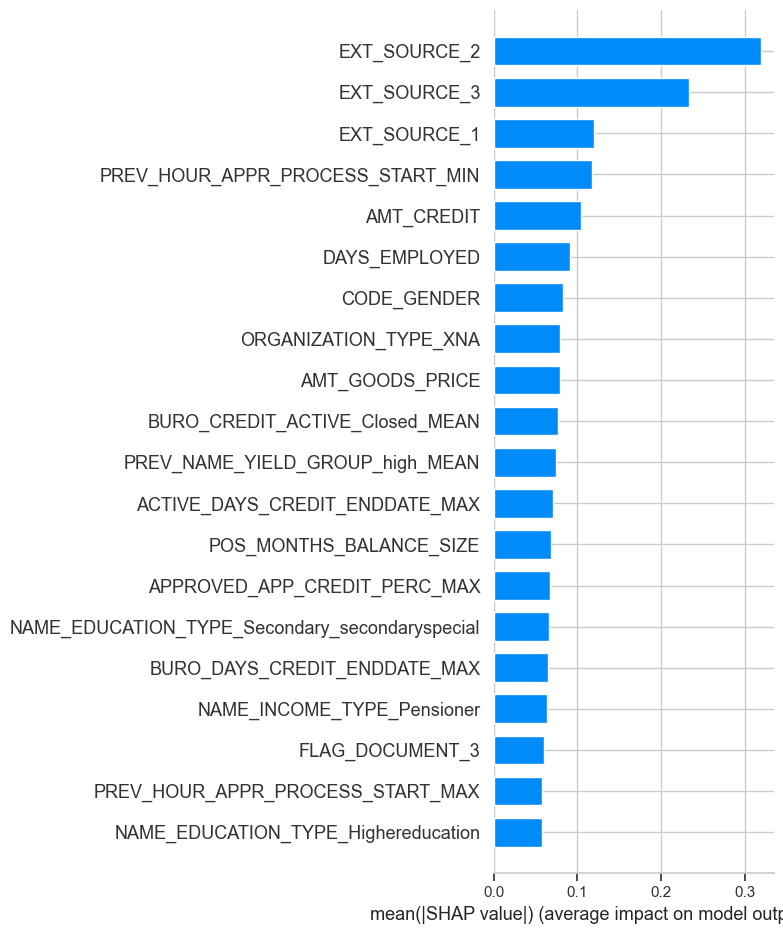

In [212]:
shap.summary_plot(shap_values, X_test, plot_type='bar')
#visualiser l'importance relative de chaque caractéristique pour l'ensemble des prédictions. 
#Les barres représentent la valeur moyenne absolue des valeurs SHAP pour chaque caractéristique

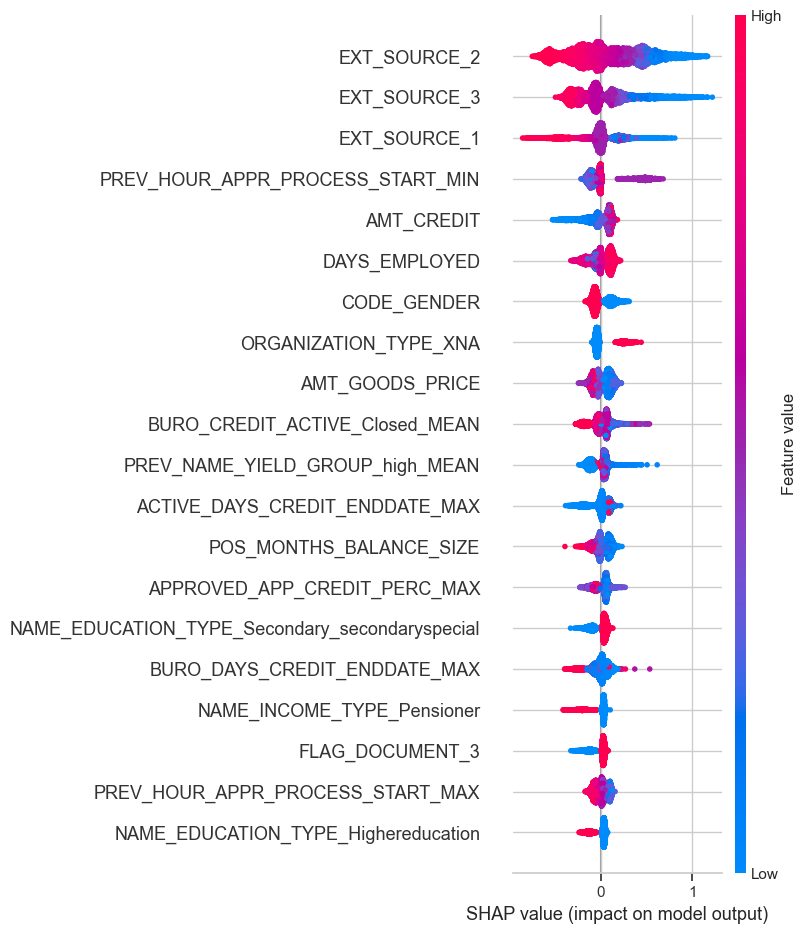

In [213]:
shap.summary_plot(shap_values, X_test)#rouge=1, homme (bleu)--> plus c'est étalé -> plus la var est importante

**Table for a global analytic interpretation**

In [214]:
# compute mean of absolute values for shap values
vals = np.abs(shap_values1).mean(0)
# compute feature importance as a dataframe containing vals
feature_importance = pd.DataFrame(list(zip(X_columns, vals)),\
                                  columns=['col_name','feature_importance_vals'])
# display top 10 feature importance sorted
pd.set_option('display.max_rows', 150)
feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10]

,col_name,feature_importance_vals
14,EXT_SOURCE_2,0.319302
15,EXT_SOURCE_3,0.233878
13,EXT_SOURCE_1,0.119986
65,PREV_HOUR_APPR_PROCESS_START_MIN,0.117375
1,AMT_CREDIT,0.104570
5,DAYS_EMPLOYED,0.091083
0,CODE_GENDER,0.083347
38,ORGANIZATION_TYPE_XNA,0.079435
2,AMT_GOODS_PRICE,0.079382
51,BURO_CREDIT_ACTIVE_Closed_MEAN,0.077403


In [215]:
pd.set_option('display.max_rows', 50)

### | Get customer number

On crée un DF data pour retrouver l'ID du dossier avec SHAP :

In [216]:
# correspondance with the array format (hence the reset index for data)
data = pd.DataFrame(y_test, index=y_test.index).reset_index()

In [217]:
data["PRED"] = y_pred

In [218]:
data.loc[data["TARGET"]==0,:]

,SK_ID_CURR,TARGET,PRED
1,307488,0.0,1
2,123642,0.0,0
3,338208,0.0,0
4,175068,0.0,0
5,344779,0.0,0
...,...,...,...
9995,313103,0.0,0
9996,353722,0.0,0
9997,220692,0.0,0
9998,353933,0.0,0


In [219]:
data.SK_ID_CURR.values

array([326926, 307488, 123642, ..., 220692, 353933, 396020], dtype=int64)

In [220]:
data.loc[data["TARGET"]==1,:]

,SK_ID_CURR,TARGET,PRED
0,326926,1.0,1
15,292658,1.0,1
18,173765,1.0,1
24,317482,1.0,1
25,127995,1.0,1
...,...,...,...
9942,189883,1.0,0
9955,338728,1.0,1
9958,155129,1.0,1
9965,435347,1.0,1


In [221]:
# client number in the original X_test file
# ex granted : 316121
# ex not granted : 416652
idx = 416652
# client number in the corresponding array
data_idx = data.loc[data["SK_ID_CURR"]==idx].index[0]
print('original client number:', idx, '\ncorresponding array number :', data_idx)

IndexError: index 0 is out of bounds for axis 0 with size 0

**vérification de l'index avec le dataframe y_test:**

In [ ]:
data.iloc[data_idx]

In [ ]:
data.iloc[data_idx]["SK_ID_CURR"] == idx

En utilisant l'index **data_idx** fourni on retombe bien sur l'**idx choisi à l'origine**.<br>
La **correspondance** est donc **exacte**.

### | Use customer number to get corresponding SHAP values

In [ ]:
# on utilise data_idx comme index et on récupère les données de X_test
# correspondantes à cet index dans la variable ID_to_predict
ID_to_predict = pd.DataFrame(X_test.iloc[data_idx,:]).T

In [ ]:
ID_to_predict

In [ ]:
data.iloc[data_idx]

**vérification de la prédiction vs TARGET y_test:**

In [ ]:
# on réalise la prédiction de ID_to_predict avec le modèle 
prediction = sum((model.predict_proba(ID_to_predict)[:, 1]>best_thresh)*1)
# (model.predict_proba(X_test)[:, 1]>best_thresh)*1
print('prediction:', prediction)
# on récupère la véritable classe y pour cet index
truth = y_test[idx]
print('truth:', truth)

In [222]:
exp_val_log = explainer.expected_value

In [ ]:
log_odds = round(explainer.model.predict(X_test.iloc[data_idx, :]),4)

In [223]:
exp_predict = round(np.exp(exp_val_log)/(1+np.exp(exp_val_log)),4)

In [224]:
prob_predict = round(np.exp(log_odds)/(1+np.exp(log_odds)),4)

NameError: name 'log_odds' is not defined

In [ ]:
prob_predict

In [ ]:
float(model.predict_proba(ID_to_predict)[:, 1])

In [ ]:
print('model reverts a log_odds of:', log_odds,'\nwhich corresponds to a probability of the 1 class of:', prob_predict)

In [ ]:
print('base values log_odds are:', exp_val_log,'\nwhich corresponds to a probability of the 1 class of:', exp_predict)

In [ ]:
print('This probability of default is ',\
      (prob_predict > best_thresh)*'>',(prob_predict < best_thresh)*'<','class 1 threshold in the model.')
print('Hence the prediction is:', prediction)

In [ ]:
shap.force_plot(shap_values.base_values[1], shap_values.values[data_idx],\
                feature_names=shap_values.feature_names)

### | Use customer number to get corresponding customer main details

In [225]:
ID_to_predict

NameError: name 'ID_to_predict' is not defined

In [226]:
top_10 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10].col_name.tolist()

In [227]:
top_10

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'CODE_GENDER',
 'ORGANIZATION_TYPE_XNA',
 'AMT_GOODS_PRICE',
 'BURO_CREDIT_ACTIVE_Closed_MEAN']

NameError: name 'ID_to_predict' is not defined

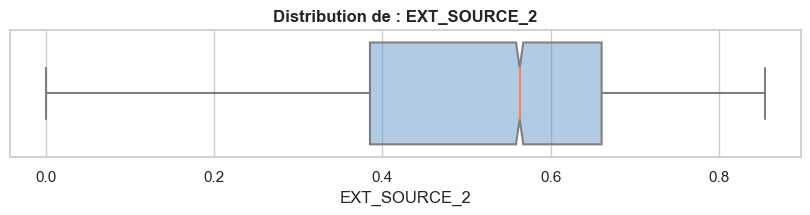

In [228]:
sel = top_10

width = 20
height = ((len(sel)+1)/2)*2

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(sel,1):
    chaine = 'Distribution de : ' + c
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    plt.title(chaine)
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)

# show customer ID values for each feature
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)

sns.set_context("talk")
plt.tight_layout()

In [229]:
# alternative
# utiliser graph objects avec une boucle sur top_10
# pour montrer uniquement des données chiffrées

sel = top_10

fig = go.Figure()

for i, c in enumerate(sel,1):
    chaine = "Val / Var Mean :<br>" + c

    if ((i == 1) | (i == 2)):
        row = 0
        column = 1 - i%2
    
    elif i % 2 != 0:
        row = int(i/2)
        column = 0
    else:
        row = int((i-1)/2)
        column = 1
    
    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = ID_to_predict[c].iloc[0],
        delta = {'reference': np.mean(X_test[c]),
                 'valueformat': '.0f',
                 'increasing': {'color': 'green'},
                 'decreasing': {'color': 'red'}},
        title = chaine,
        domain = {'row': row, 'column': column}))

fig.update_layout(
    grid = {'rows': 5, 'columns': 2, 'pattern': "independent", 'xgap' : 0.5, 'ygap' : 0.6})

fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

plt.tight_layout()

fig.show()

NameError: name 'ID_to_predict' is not defined

CODE_GENDER : '0' is MALE / '1' is FEMALE

### | Jauge vizualisation

In [231]:
if prob_predict < best_thresh:
    title_auto = {'text':"<b>No probability of default detected</b><br>\
<span style='color: forestgreen; font-size:0.9em'>Credit<br><b>Granted</b></span>", \
                  'font': {'color': 'forestgreen', 'size': 15}}
else:
    title_auto = {'text':"<b>Probability of default detected</b><br>\
<span style='color: crimson; font-size:0.9em'>Credit<br><b>Not granted</b></span>", \
                  'font': {'color': 'crimson', 'size': 15}}


fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = prob_predict,
    mode = "gauge+number+delta",
    title = title_auto,
    delta = {'reference': best_thresh},
    gauge = {'axis': {'range': [None, 1]},
             'bgcolor': "crimson",
             'borderwidth': 2,
             'bordercolor': "gray",
             'steps' : [
                 {'range': [0, best_thresh], 'color': "forestgreen"},
                 {'range': [best_thresh, 0.5], 'color': "crimson"}],
             'threshold' : {'line': {'color': "crimson", 'width': 2}, 'thickness': 1, 'value': best_thresh},
             'bar': {'color': "palegoldenrod"}}))

if prob_predict < best_thresh:
    fig.update_layout(paper_bgcolor = "honeydew", font = {'color': "darkgreen", 'family': "Arial"})
else:
    fig.update_layout(paper_bgcolor = "lavenderblush", font = {'color': "crimson", 'family': "Arial"})

fig.show()

NameError: name 'prob_predict' is not defined

### | Observation vs Group

In [232]:
top_20 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:20].col_name.tolist()

In [233]:
feat_tot = feature_importance.feature_importance_vals.sum()

In [234]:
feat_top = feature_importance.loc[feature_importance['col_name'].isin(top_20)].feature_importance_vals.sum()

In [235]:
print('les 20 premières features représentent', round((feat_top/feat_tot)*100, 2),'% de l\'importance de toutes les features.')

les 20 premières features représentent 57.52 % de l'importance de toutes les features.


NameError: name 'ID_to_predict' is not defined

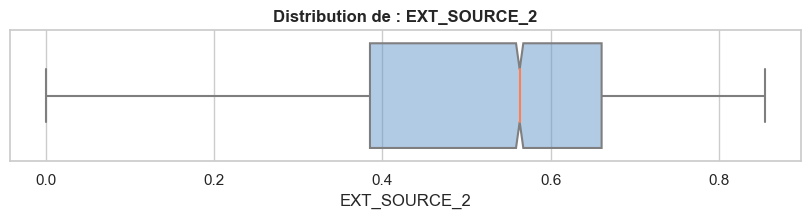

In [236]:
# Show boxplot for each feature with original units
# selection of 20 most explicative features
sel = top_20

width = 20
height = ((len(sel)+1)/2)*2

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(sel,1):
    chaine = 'Distribution de : ' + c
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    plt.title(chaine)
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)

# show customer ID values for each feature
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)

# scaling automatique ('notebook', 'paper', 'talk', 'poster')
sns.set_context("talk")
fig.tight_layout()

Vérification des valeurs retournées dans les boxplot pour ID_to_predict :

In [ ]:
ID_to_predict[["EXT_SOURCE_2", "EXT_SOURCE_3", "EXT_SOURCE_1", "ORGANIZATION_TYPE_XNA", "NAME_INCOME_TYPE_Pensioner",
              "AMT_GOODS_PRICE", "PREV_HOUR_APPR_PROCESS_START_MAX", "CODE_GENDER", "PREV_NAME_YIELD_GROUP_high_MEAN"]]

### | Force plot visualization & explanation

In [237]:
# link = 'logit' to get the output in the same unit than the model target
# here we can see the probability of class 1
shap.force_plot(
    explainer.expected_value,
    shap_values1[data_idx, :],
    X_test.iloc[data_idx, :],
    link='logit' # choose between 'logit' or 'identity'
)

NameError: name 'data_idx' is not defined

In [ ]:
print(f'the model predicted :',round(float(model['classifier'].predict_proba(ID_to_predict)[:,1]),4))

**Comment interpréter ce résultat ?**

Le modèle a prédit une probabilité de 0,0657 pour la classe 1, alors que la valeur de base est de 0,0677. Les valeurs des caractéristiques entraînant une augmentation des prédictions sont en rose, et leur taille visuelle indique l'ampleur de l'effet de la caractéristique. Les valeurs des caractéristiques qui diminuent les prédictions sont en bleu.

L'impact le plus important provient de EXT_SOURCE_2 avec 0,6674, suivi par APPROVED_APP_CREDIT_PERC_MAX avec 1,111. La valeur EXT_SOURCE_3 a également un effet significatif sur la prédiction.

Si l'on soustrait la longueur des barres bleues de la longueur des barres roses, on obtient la distance entre la valeur de base et la sortie.

Traduit avec DeepL.com (version gratuite)

### | Waterfall visualization & explanation

In [ ]:
shap.waterfall_plot(shap_values[data_idx], max_display=10, show=True)

### | Proposed visualizations

In [ ]:
explainer.expected_value

In [ ]:
shap_values.base_values[data_idx]

In [ ]:
def sample_feature_importance(idx, type='feat_import'):
    if type=='odds_default':
        return shap.force_plot(shap_values.base_values[idx], shap_values1[idx, :],\
                               X_test.iloc[idx, :])
    
    elif type=='base_val_to_odds':
        return shap.waterfall_plot(shap_values[idx],
                                   max_display=10)
    
    elif type=='summary_global':
        return shap.summary_plot(shap_values, X_test,
                                 max_display=10, # nb of displayed features
                                )
    
    elif type=='feat_import':
        return shap.summary_plot(shap_values, X_test,
                                 plot_type="bar", feature_names=X_columns)

    elif type=='prob_default':
        return shap.force_plot(shap_values.base_values[idx],
                               shap_values1[idx, :],
                               X_test.iloc[idx, :],
                               link='logit') # choose between 'logit' or 'identity'

    else:
        return "Return valid visual ('feat_import', 'base_val_to_odds', 'summary_global',\
        'odds_default', 'prob_default')"

plt.show()

In [ ]:
sample_feature_importance(data_idx, type='odds_default')

In [ ]:
sample_feature_importance(data_idx, type='base_val_to_odds')

In [ ]:
sample_feature_importance(data_idx, type='summary_global')

In [ ]:
sample_feature_importance(data_idx, type='feat_import')

In [ ]:
sample_feature_importance(data_idx, type='prob_default')

### | Other visualizations

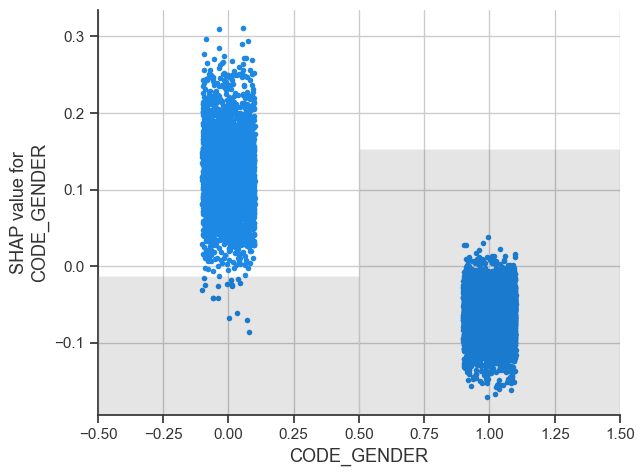

In [238]:
# visualize the model's dependence on the first feature
shap.plots.scatter(shap_values[:, 0])

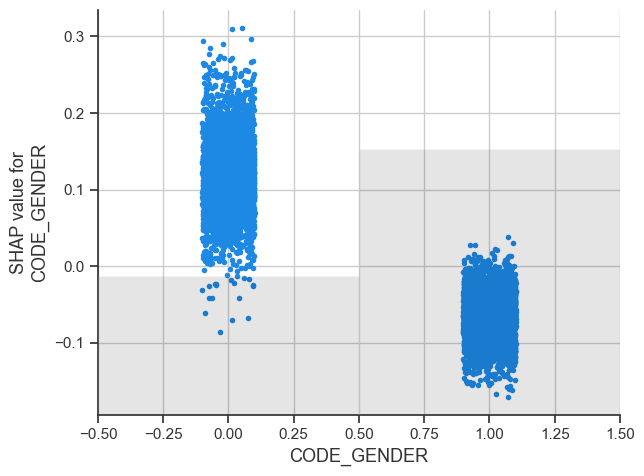

In [239]:
# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values[:, 0])

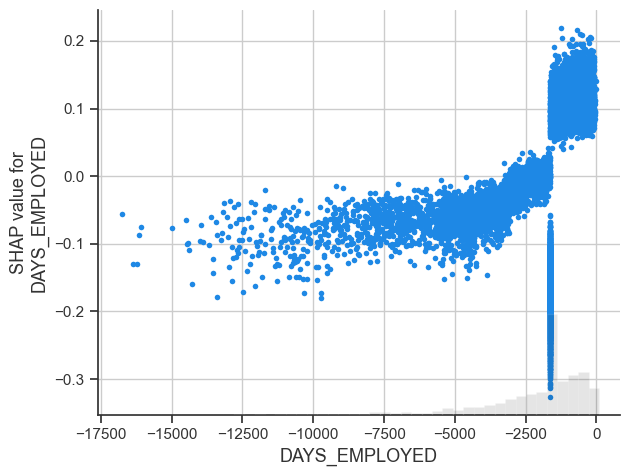

In [240]:
shap.plots.scatter(shap_values[:, "DAYS_EMPLOYED"])

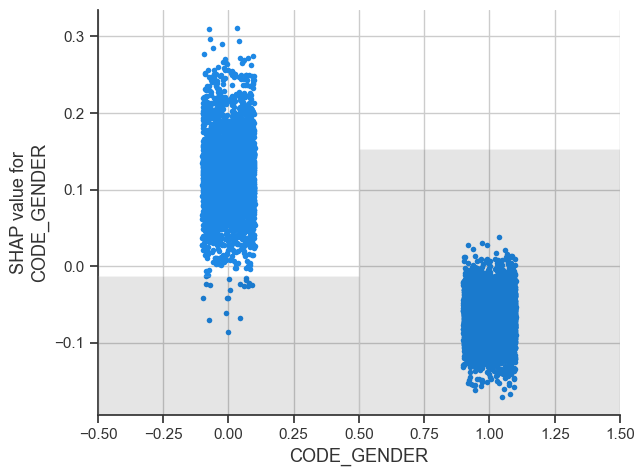

In [241]:
# visualize the model's dependence on a particular feature [col number]
# in the original feature space
shap.plots.scatter(shap_values[:, 0])

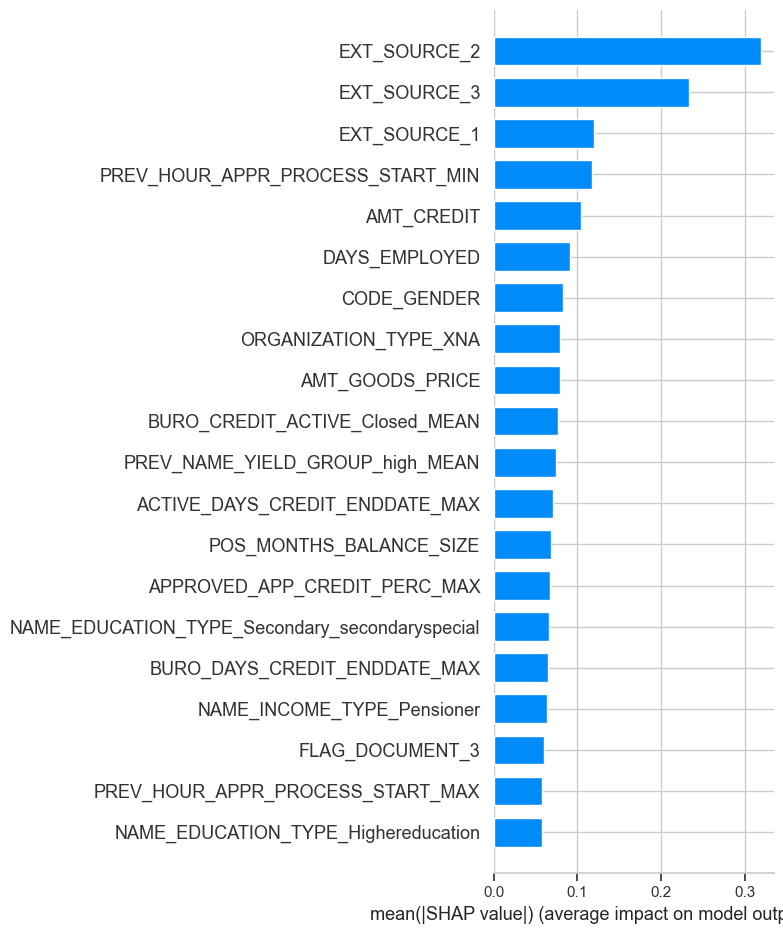

In [242]:
#plot the feature importance
# ajouter valeur en dur dessus 
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_columns)

In [243]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values1[0:30,:], X_test.iloc[0:30,:])

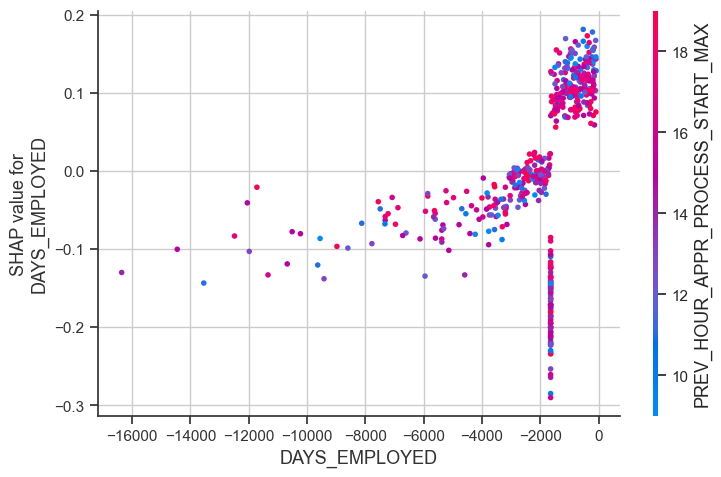

In [244]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("DAYS_EMPLOYED",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

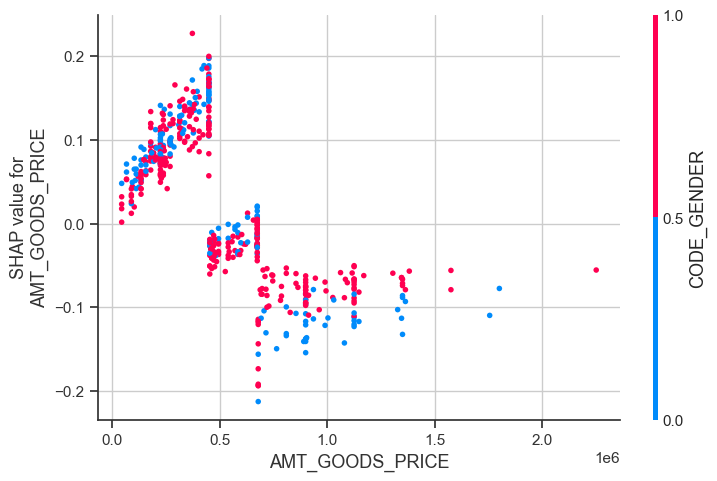

In [245]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("AMT_GOODS_PRICE",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

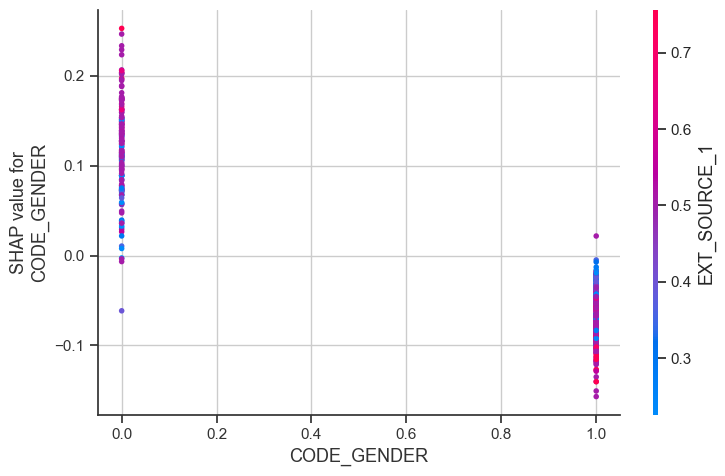

In [246]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("CODE_GENDER",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

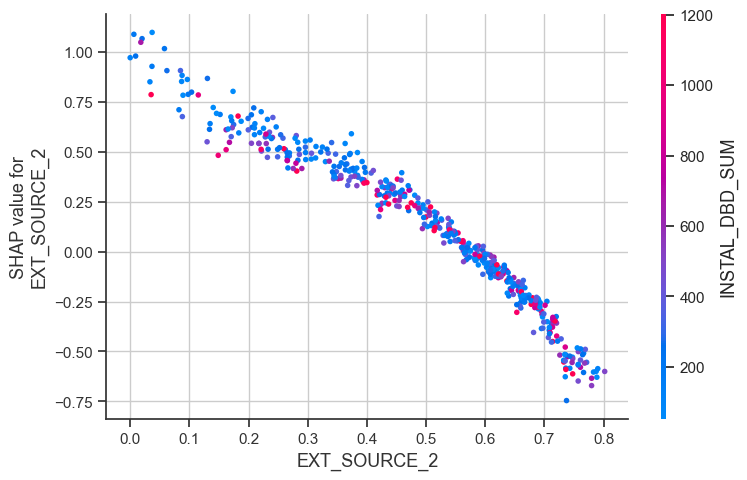

In [247]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("EXT_SOURCE_2",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

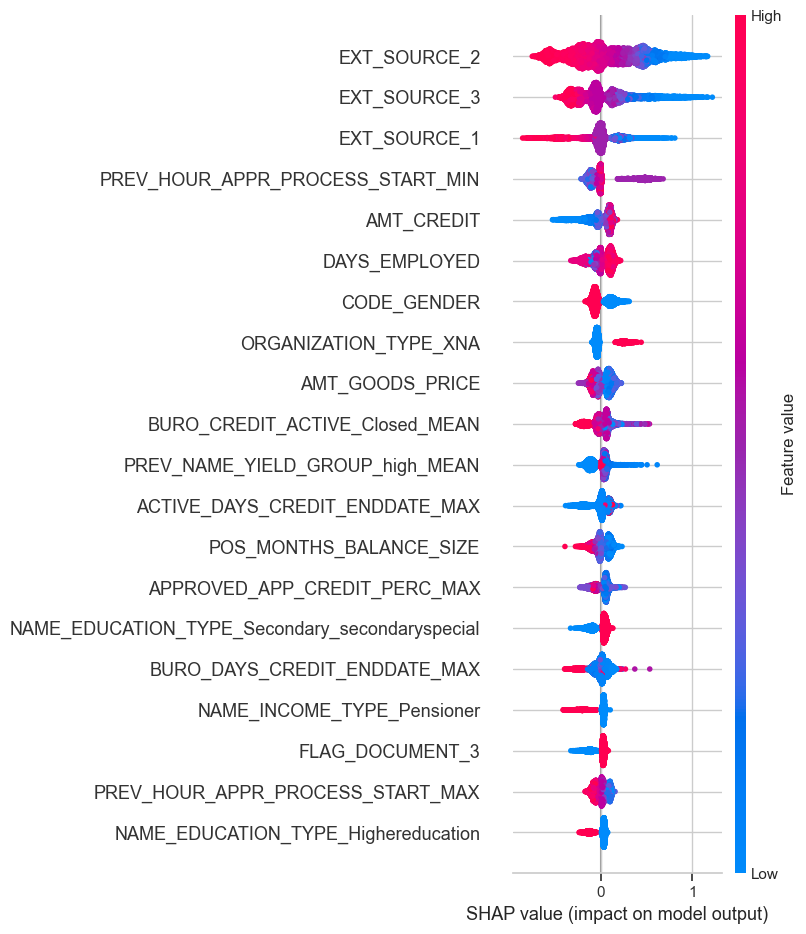

In [248]:
# summarize the effects of all the features
shap.summary_plot(shap_values1[0:10000,:], X_test.iloc[0:10000,:])

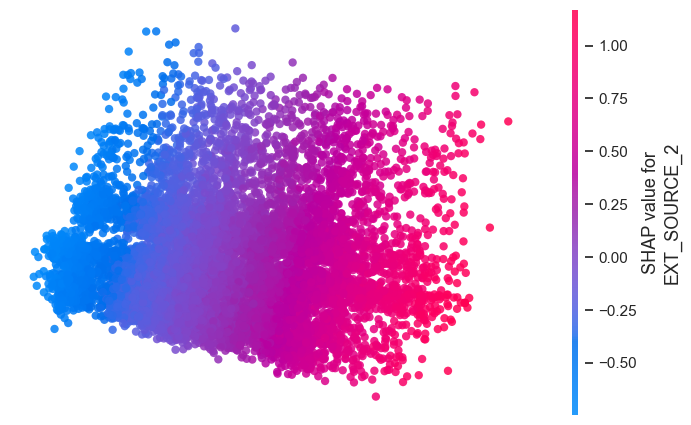

In [249]:
shap.embedding_plot("EXT_SOURCE_2", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)

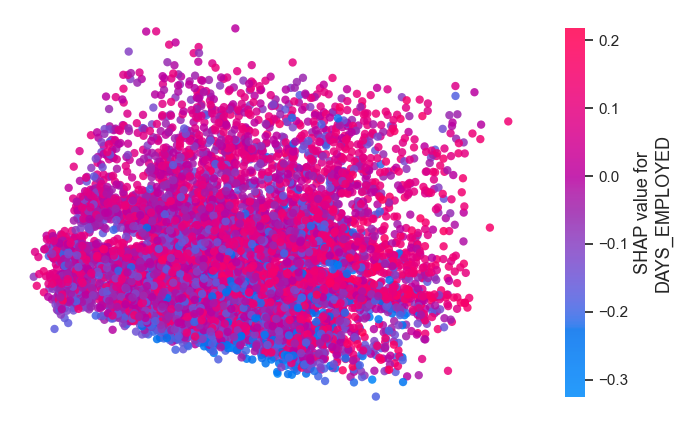

In [250]:
shap.embedding_plot("DAYS_EMPLOYED", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)

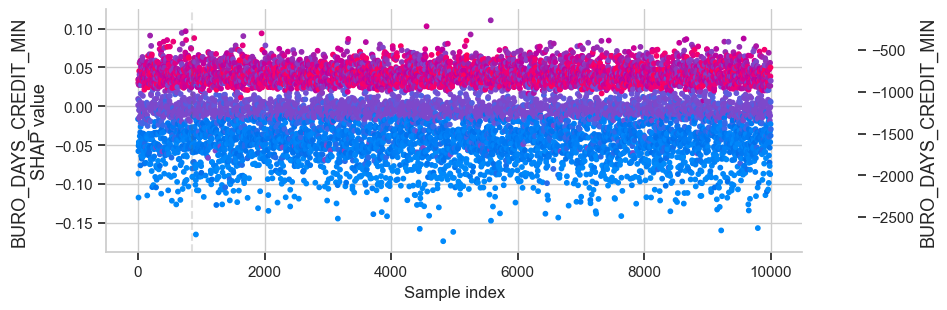

In [251]:
shap.monitoring_plot(42, shap_values1, X_test, feature_names=X_columns, show=True)

### | Dependencies

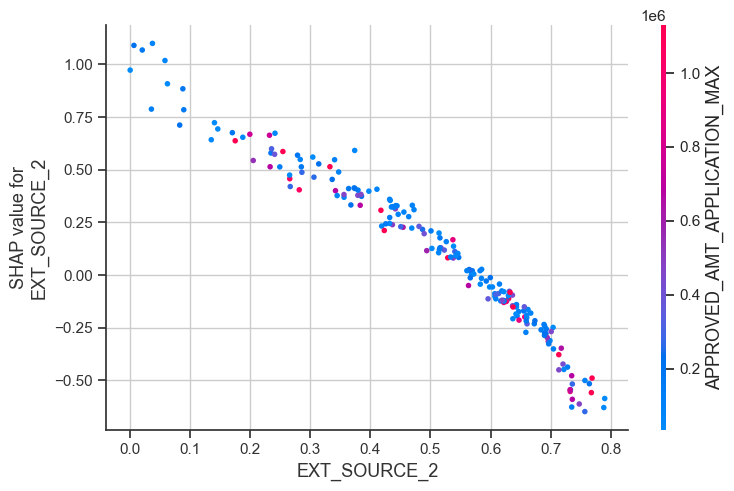

In [252]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("EXT_SOURCE_2",
                     shap_values1[0:200,:],
                     X_test.iloc[0:200,:])

In [253]:
shap.dependence_plot('AMT_CREDIT',
                     shap_values1,
                     features = X_test,
                     feature_names=X_columns,
                     display_features = X_test,
                     interaction_index="BURO_CREDIT_TYPE_Credit card_MEAN")

ValueError: Could not find feature named: BURO_CREDIT_TYPE_Credit card_MEAN

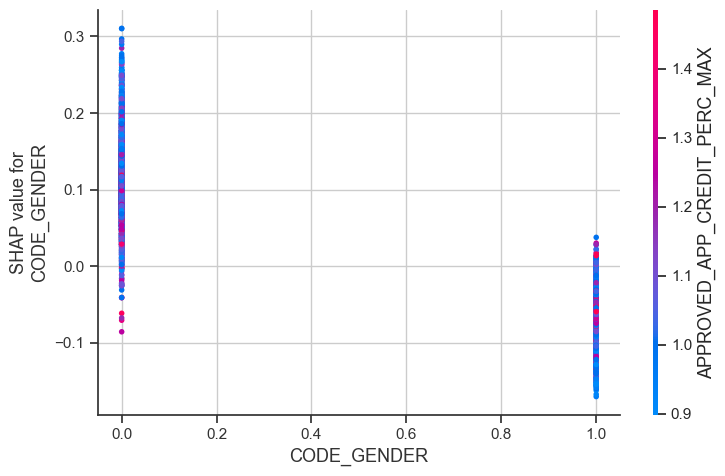

In [255]:
shap.dependence_plot('CODE_GENDER',
                     shap_values1,
                     features = X_test,
                     feature_names=X_columns,
                     display_features = X_test,
                     interaction_index="APPROVED_APP_CREDIT_PERC_MAX")

Dependencies with the top 3 features in the dataset :

In [256]:
# Sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values1), 0))

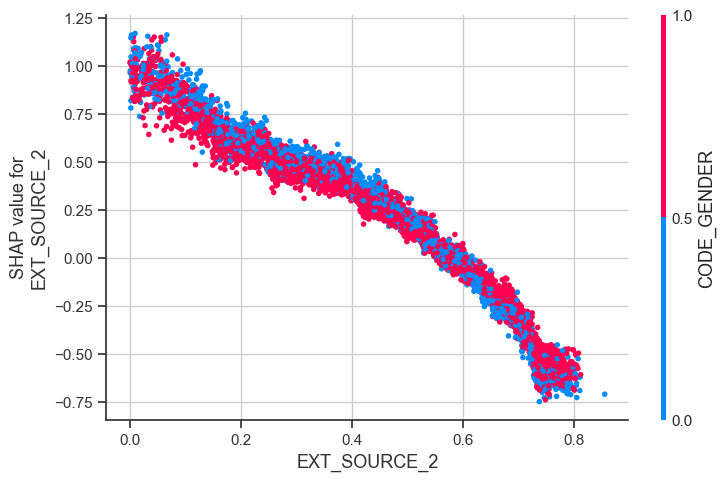

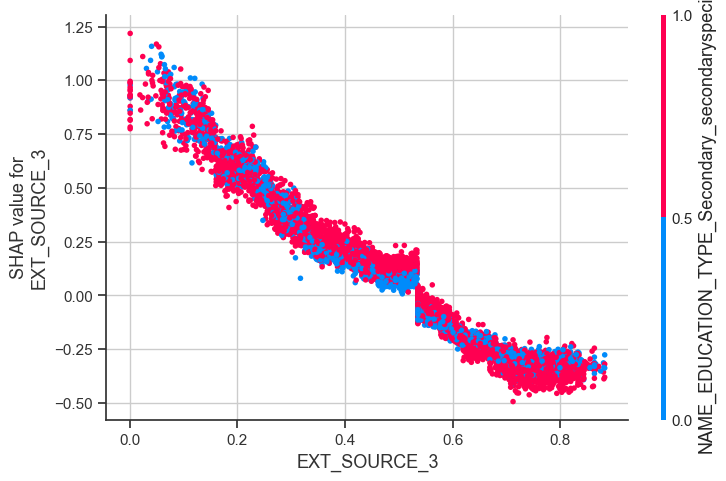

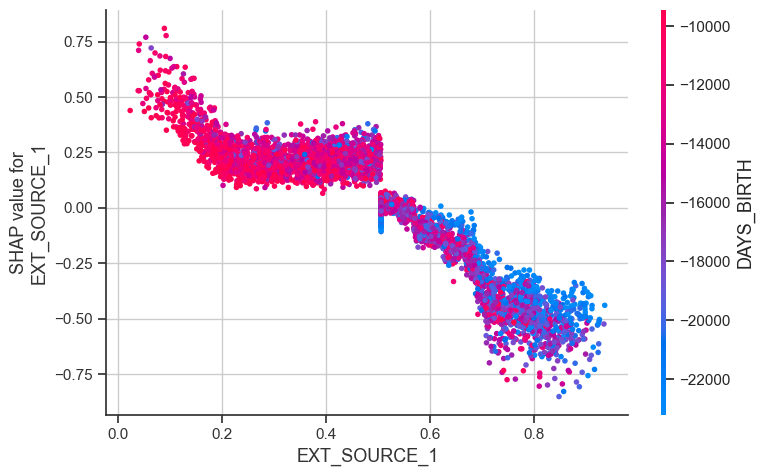

In [257]:
# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i],
                         shap_values1,
                         features = X_test,
                         feature_names=X_columns,
                         display_features = X_test,)

# | Pickle backup | Feature explainer, SHAPE values, expected value

In order to get similar graphics and data availibility with Streamlite, I export the final versions of data, explainer and shape values.

In [258]:
# Backup Model final
joblib.dump(model, 'Models/model.joblib')

# Backup X_test
joblib.dump(X_test, 'Models/X_test.pkl')

# Backup y_test
joblib.dump(y_test, 'Models/y_test.pkl')

# Backup y_pred
joblib.dump(y_pred, 'Models/y_pred.pkl')

# backup SHAP explainer
explainer.save(open('Models/explainer', 'wb') , model_saver="auto", masker_saver="auto")

# Backup SHAP values
joblib.dump(shap_values, 'Models/shap_values.pkl')

# Backup SHAP values1
joblib.dump(shap_values1, 'Models/shap_values1.pkl')

# Backup Expected values
joblib.dump(explainer.expected_value, 'Models/expected_values.pkl')

['Models/expected_values.pkl']

# | Identification Shap_Values.data for GENDER_CODE

In [259]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')

In [260]:
X_test

,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE_Cashloans,NAME_CONTRACT_TYPE_Revolvingloans,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Highereducation,NAME_EDUCATION_TYPE_Secondary_secondaryspecial,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_blockofflats,WALLSMATERIAL_MODE_Panel,DAYS_EMPLOYED_PERC,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_CREDIT_ACTIVE_Closed_MEAN,BURO_CREDIT_TYPE_Creditcard_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MEAN,PREV_APP_CREDIT_PERC_MEAN,PREV_HOUR_APPR_PROCESS_START_MIN,PREV_HOUR_APPR_PROCESS_START_MAX,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MEAN,PREV_NAME_CONTRACT_TYPE_Consumerloans_MEAN,PREV_NAME_CONTRACT_TYPE_Revolvingloans_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_MEAN,PREV_NAME_PAYMENT_TYPE_XNA_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,PREV_NAME_TYPE_SUITE_nan_MEAN,PREV_NAME_GOODS_CATEGORY_Furniture_MEAN,PREV_NAME_GOODS_CATEGORY_XNA_MEAN,PREV_NAME_PORTFOLIO_Cards_MEAN,PREV_NAME_PORTFOLIO_POS_MEAN,PREV_NAME_PRODUCT_TYPE_walkin_MEAN,PREV_CHANNEL_TYPE_APCashloan_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_PRODUCT_COMBINATION_CardStreet_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,PREV_PRODUCT_COMBINATION_CashXSellhigh_MEAN,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,APPROVED_AMT_ANNUITY_MAX,APPROVED_AMT_ANNUITY_MEAN,APPROVED_AMT_APPLICATION_MAX,APPROVED_AMT_APPLICATION_MEAN,APPROVED_APP_CREDIT_PERC_MAX,APPROVED_AMT_GOODS_PRICE_MAX,APPROVED_AMT_GOODS_PRICE_MEAN,APPROVED_HOUR_APPR_PROCESS_START_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,APPROVED_DAYS_DECISION_MIN,APPROVED_DAYS_DECISION_MEAN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,1.0,521280.0,450000.0,0.008575,-15323.0,-1503.0,-2574.0,-3753.0,1.0,2.0,2.0,0.0,0.0,0.494646,0.598417,0.535276,0.0,0.0000,0.0034,0.0,0.0000,0.0036,0.0,0.0000,0.0035,0.0033,1.0,0.0,-1238.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.098088,-2446.0,-2446.0,-2446.000000,3.851066e+05,-2081.0,-2081.0,-2081.000000,-342.000000,0.000000,0.000000,0.000000,0.0,-764.0,-258.0,-537.309524,108150.333333,1051.0,-2002.0,-1366.555556,-761.5,8491.725,8491.725000,1.137221,14.0,17.0,15.500000,0.265029,0.132514,-1863.0,-1550.500000,1.000000,0.000000,0.500000,0.500000,1.000000,0.000000,0.500000,0.0,0.0,0.500000,1.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,8491.725,8491.725,53496.0,53496.000,1.274443,53496.0,53496.000,14.000000,0.265029,-1863.0,-1863.000000,-58.000000,7.0,7.0,42.0,-1753.833333,-10523.0
1,0.0,1185120.0,900000.0,0.046220,-15860.0,-356.0,-7002.0,-1683.0,1.0,1

In [261]:
X_test.CODE_GENDER.value_counts()

1.0    6559
0.0    3441
Name: CODE_GENDER, dtype: int64

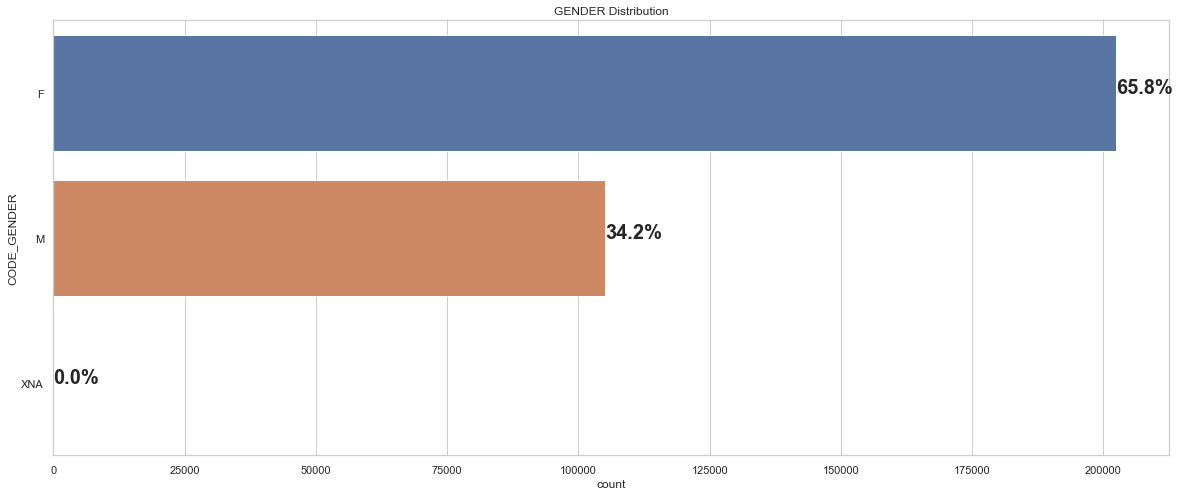

Same proportions than in EDA phase :
-  CODE_GENDER 1 = Female
-  CODE_GENDER 0 = Male

Besoin d'ajouter un commentaire dans l'application Streamlit pour aider à comprendre ce champ.
La prochaine fois, un véritable encodage à chaud en 2 colonnes serait préférable pour une meilleure compréhension.